# Scoring


In [3]:
import pandas as pd
import re
from collections import Counter

import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("result_df_scores.csv") 
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [12]:
df 

,expected_output,actual_output,scores,ground_truth,ground_truth_num_particles,actual_output_particles,expected_output_num_particles
0,"\n\nA: I cut until this length ok?\nB: Yeah, o...","\n\n\nA: I cut until this length ok?\nB: Yeah,...",0.000,[leh51],1,[leh33],1
1,\nA: Bank robbery leh51,"\n\nA: Bank robbery leh33, and you dare to tac...",0.000,[leh51],1,[leh33],1
2,\n\nA: So where are we meeting later?\nB: we s...,\n\n\nA: So where are we meeting later?\nB: we...,1.000,[lah21],1,[lah21],1
3,\n\nA: Did you enjoy your weekend?\nB: I had t...,\n\n\nA: Did you enjoy your weekend?\nB: I had...,1.000,[lor33],1,[lor33],1
4,"\n\nA: Hey, where are you right now?\nB: I'm a...","\n\n\nA: Hey, where are you right now?\nB: I'm...",1.000,[leh33],1,[leh33],1
5,\n\nA: What are you shopping for?\nB: Watch lo...,\n\n\nA: What are you shopping for?\nB: Watch ...,0.500,"[lor33, leh21]",2,"[lor33, leh33]",2
6,"\n\nA: Huh, are you still doing yesterday's tu...","\n\n\nA: Huh, are you still doing yesterday's ...",0.500,"[leh21, lah21]",2,"[leh33, lah21]",2
7,"\n\nA: Hey, did you tell Shuhui about the surp...","\n\n\nA: Hey, did you tell Shuhui about the su...",0.500,"[leh21, leh33]",2,"[leh33, leh33]",2
8,"\n\nA: Hey, have you been to Sarah's house? \n...","\n\n\nA: Hey, have you been to Sarah's house? ...",0.500,"[leh21, leh33]",2,"[leh33, leh21]",2
9,"\n\nA: Hey, are you coming to the party tonigh...","\n\n\nA: Hey, are you coming to the party toni...",0.000,[leh51],1,[leh33],1


In [7]:
def extract_particles(text):
  LIST_OF_PARTICLES = [r'lah\d{2}', r'lor\d{2}', r'leh\d{2}']
  pattern = r"\b" + "|".join(LIST_OF_PARTICLES)  + r"\b"
  return re.findall(pattern, text)

# TEST
extract_particles("walao lah21 leh33, you lah21, ofc you lor33")

['lah21', 'leh33', 'lah21', 'lor33']

In [8]:
df['ground_truth'] = df['expected_output'].apply(lambda x: extract_particles(x))

In [9]:
df['ground_truth_num_particles'] = df['ground_truth'].apply(lambda x: len(x))

In [10]:
df['actual_output_particles'] = df['actual_output'].apply(lambda x: extract_particles(x))

In [11]:
df['expected_output_num_particles'] = df['actual_output_particles'].apply(lambda x: len(x))

In [77]:
df.to_excel('result_df_scores.xlsx')

### Dataset Expected Output EDA

Particles in original dataset

In [14]:
original_df = pd.read_excel('../final_clean_data/aligned_labels_formatted/final_dataset_v2.0.xlsx')
original_df['ground_truth_particles'] = original_df['output'].apply(lambda x: extract_particles(x))
original_df

,Unnamed: 0,output,conversation,ground_truth_particles
0,0,"\n\nA: Hey, what are your plans for today?\nB:...","\n\nA: Hey, what are your plans for today?\nB:...",[lor33]
1,1,\n\nA: We meet after my work at 6 plus ok? U a...,\n\nA: We meet after my work at 6 plus ok? U a...,[lor33]
2,2,"\n\nA:Im still sleeping hahah\nB: Ok, you go h...","\n\nA:Im still sleeping hahah\nB: Ok, you go h...",[lor33]
3,3,\n\nA:Are you going for the outing later?\nB: ...,\n\nA:Are you going for the outing later?\nB: ...,[lor33]
4,4,"\n\nA: I'm eating now lor33, but going back to...","\n\nA: I'm eating now lor, but going back to w...","[lor33, leh33]"
...,...,...,...,...
493,277,"\nA: Eh, you mean you never see her at all ah?...","\nA: Eh, you mean you never see her at all ah?...",[lah21]
494,278,"\nC: Ya, is the Science Department quite far f...","\nC: Ya, is the Science Department quite far f...","[leh33, lah21]"
495,279,"\nC: Eh, okay lah21, but he seems to have some...","\nC: Eh, okay lah, but he seems to have some s...","[lah21, leh33]"
496,280,"\nA: How come leh33?\n\nC: Don\'t know, he kee...","\nA: How come leh?\n\nC: Don\'t know, he keeps...","[leh33, lah24]"


In [15]:
def get_particle_counts(colname, df):
    flattened_list = df[colname].explode().tolist() 
    distribution = Counter(flattened_list)
    distribution_df = pd.DataFrame(list(distribution.items()), columns=['Element', 'Count'])
    distribution_df = distribution_df.sort_values(by='Count', ascending=False)
    return distribution_df

particle_order = ['lah21', 'lah51','lah24', 'leh51', 'leh21', 'leh33', 'lor33' ]
original_count_df = get_particle_counts('ground_truth_particles', original_df)
original_count_df

,Element,Count
2,lah21,269
1,leh33,141
5,lah51,132
0,lor33,109
3,leh21,51
6,lah24,29
4,leh51,16


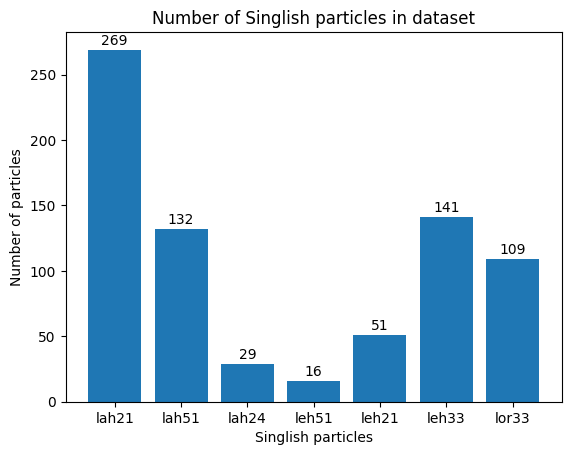

In [17]:
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 1.5),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')
        
original_count_df = original_count_df.set_index('Element').reindex(particle_order).reset_index()

bars = plt.bar(original_count_df['Element'], original_count_df['Count'])

plt.xlabel('Singlish particles')
plt.ylabel('Number of particles')
plt.title('Number of Singlish particles in dataset')
autolabel(bars)
plt.show()

In [18]:
original_count_df['Count'].sum()

747

In [19]:
original_count_df['original_particle'] = original_count_df['Element'].apply(lambda x: x[:-2])
original_count_df.groupby('original_particle').sum()

,Element,Count
original_particle,,
lah,lah21lah51lah24,430
leh,leh51leh21leh33,208
lor,lor33,109


Particles in test dataset
- count of particles for each conversation
- count by particle's lexical tone definition

In [20]:
num_particles_in_convos = df['ground_truth_num_particles'].value_counts().reset_index()
num_particles_in_convos

,ground_truth_num_particles,count
0,1,36
1,2,20
2,3,3
3,4,1


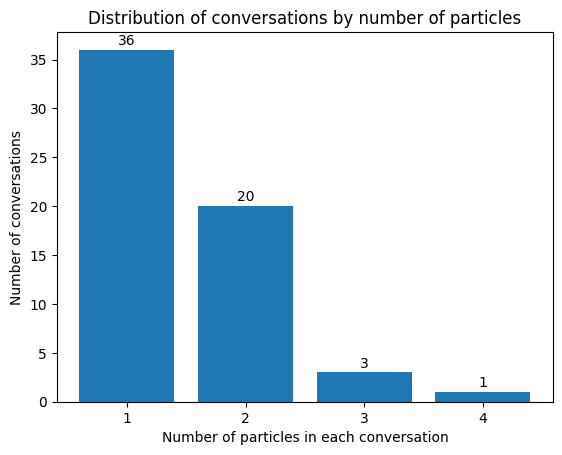

In [21]:
num_particles_in_convos['ground_truth_num_particles'] = num_particles_in_convos['ground_truth_num_particles'].apply(str)
bars = plt.bar(num_particles_in_convos['ground_truth_num_particles'], num_particles_in_convos['count'])
plt.xlabel('Number of particles in each conversation')
plt.ylabel('Number of conversations')
plt.title('Distribution of conversations by number of particles')
autolabel(bars)
plt.show()

In [160]:
test_dataset_count = get_particle_counts('ground_truth', df)
test_dataset_count

,Element,Count
1,lah21,29
5,lah51,20
3,leh33,19
2,lor33,10
4,leh21,5
0,leh51,4
6,lah24,2


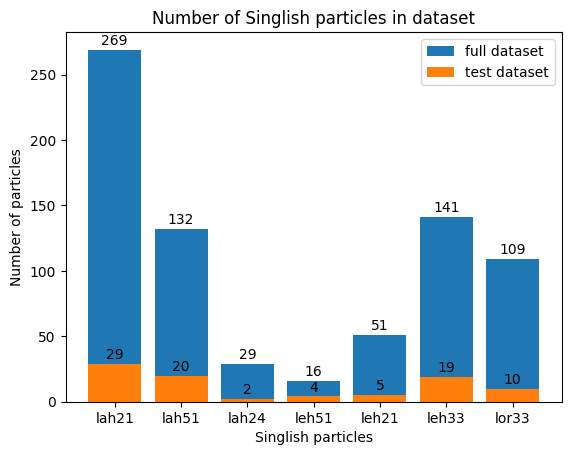

In [167]:
original_count_df = original_count_df.set_index('Element').reindex(particle_order).reset_index()

bars = plt.bar(original_count_df['Element'], original_count_df['Count'], label='full dataset')
bars2 = plt.bar(test_dataset_count['Element'], test_dataset_count['Count'], label='test dataset')

plt.xlabel('Singlish particles')
plt.ylabel('Number of particles')
plt.title('Number of Singlish particles in dataset')
autolabel(bars)
autolabel(bars2)
plt.legend()
plt.show()

### Dataset Actual Output EDA

Score analysis 
- by overall score for each conversation
- total score
- score grouped by num of particles in each conversation
- count of particles by lexical tone definition

In [26]:
overall_score_distribution = df['scores'].value_counts().reset_index()
overall_score_distribution


,scores,count
0,1.000,31
1,0.000,16
2,0.500,10
3,0.750,1
4,0.667,1
5,0.333,1


In [27]:
print(f"TOTAL ACCURACY out of {len(df)}")
sum(overall_score_distribution['count']*overall_score_distribution['scores'])

TOTAL ACCURACY out of 60


37.75

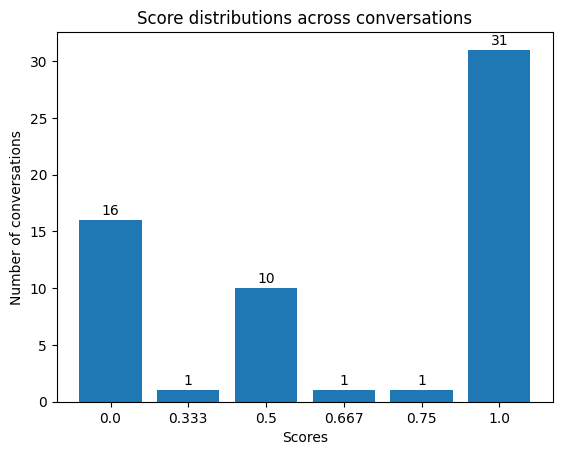

In [28]:
overall_score_distribution['scores'] = overall_score_distribution['scores'].apply(str)
overall_score_distribution = overall_score_distribution.sort_values(by='scores')

bars = plt.bar(overall_score_distribution['scores'], overall_score_distribution['count'])

plt.xlabel('Scores')
plt.ylabel('Number of conversations')
plt.title('Score distributions across conversations')
autolabel(bars)
plt.show()

In [29]:
distribution_table = df[['scores', 'ground_truth_num_particles']].value_counts().reset_index()
distribution_table

,scores,ground_truth_num_particles,count
0,1.000,1,20
1,0.000,1,16
2,0.500,2,10
3,1.000,2,10
4,0.333,3,1
5,0.667,3,1
6,0.750,4,1
7,1.000,3,1


In [30]:
get_particle_counts('actual_output_particles', df)

,Element,Count
1,lah21,51
0,leh33,25
2,lor33,11
3,leh21,3


In [31]:
df_incorrect = df[df['scores'] != 1.0]
df_incorrect

,expected_output,actual_output,scores,ground_truth,ground_truth_num_particles,actual_output_particles,expected_output_num_particles
0,"\n\nA: I cut until this length ok?\nB: Yeah, o...","\n\n\nA: I cut until this length ok?\nB: Yeah,...",0.000,[leh51],1,[leh33],1
1,\nA: Bank robbery leh51,"\n\nA: Bank robbery leh33, and you dare to tac...",0.000,[leh51],1,[leh33],1
5,\n\nA: What are you shopping for?\nB: Watch lo...,\n\n\nA: What are you shopping for?\nB: Watch ...,0.500,"[lor33, leh21]",2,"[lor33, leh33]",2
6,"\n\nA: Huh, are you still doing yesterday's tu...","\n\n\nA: Huh, are you still doing yesterday's ...",0.500,"[leh21, lah21]",2,"[leh33, lah21]",2
7,"\n\nA: Hey, did you tell Shuhui about the surp...","\n\n\nA: Hey, did you tell Shuhui about the su...",0.500,"[leh21, leh33]",2,"[leh33, leh33]",2
8,"\n\nA: Hey, have you been to Sarah's house? \n...","\n\n\nA: Hey, have you been to Sarah's house? ...",0.500,"[leh21, leh33]",2,"[leh33, leh21]",2
9,"\n\nA: Hey, are you coming to the party tonigh...","\n\n\nA: Hey, are you coming to the party toni...",0.000,[leh51],1,[leh33],1
10,\n\nA: Photographic society has a meeting on W...,\n\n\nA: Photographic society has a meeting on...,0.500,"[lah51, leh33]",2,"[lah21, leh33]",2
15,"\n\nA: There's nothing to eat at home\nB: Oh, ...",\n\n\nA: There's nothing to eat at home\nB: Oh...,0.000,[lah51],1,[lah21],1
17,"\n\nA: Hey, are you excited for university ori...","\n\n\nA: Hey, are you excited for university o...",0.000,[lah24],1,[lah21],1


Accuracy by particle

In [32]:
# Function to compare elements in each cell and count the occurrences
def compare_and_count(row, col):
    count = Counter(row[col])
    return pd.Series(count)

ground_truth_distribution_df = df.apply(lambda row: compare_and_count(row, col='ground_truth'), axis=1).fillna(0)
# ground_truth_distribution_df

In [33]:
output_distribution_df = df.apply(lambda row: compare_and_count(row, col='actual_output_particles'), axis=1).fillna(0)
for column in list(ground_truth_distribution_df.columns):
    if column not in output_distribution_df.columns:
        output_distribution_df[column] = 0.0
# output_distribution_df.columns = [col+ '_model' for col in list(output_distribution_df.columns)]
# output_distribution_df

In [34]:
# compare 
compare_distribution_df = pd.concat([ground_truth_distribution_df, output_distribution_df], axis=1)
# compare_distribution_df

In [41]:
ground_truth_distribution_df

,lah21,lah24,lah51,leh21,leh33,leh51,lor33
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
ground_truth_distribution_df.sum()

lah21    29.0
lah24     2.0
lah51    20.0
leh21     5.0
leh33    19.0
leh51     4.0
lor33    10.0
dtype: float64

In [43]:
counts = {'correct': {}, 'incorrect': {}}
for column in ground_truth_distribution_df.columns:
    counts['correct'][column] = 0
    counts['incorrect'][column] = 0

for index, row in ground_truth_distribution_df.iterrows():
    # Iterate over the columns
    for column in ground_truth_distribution_df.columns:
        # Check if the value in the ground_truth DataFrame is non-zero
        if row[column] != 0:
            # Check if the corresponding value in output_df matches
            if row[column] == output_distribution_df.loc[index, column]:
                counts['correct'][column] += row[column]
            else:
                counts['incorrect'][column] += max(1, abs(row[column] - output_distribution_df.loc[index, column]))

compare_particle_accuracy_df = pd.DataFrame(counts)
compare_particle_accuracy_df

,correct,incorrect
lah21,23.0,4.0
lah24,0.0,2.0
lah51,0.0,20.0
leh21,2.0,3.0
leh33,16.0,2.0
leh51,0.0,4.0
lor33,10.0,0.0
